In [1]:
#Setup without google drive access
data_folder = 'data'
!git clone https://github.com/mogwai/fastai_audio.git
%cd fastai_audio
!git pull
!bash install.sh

fatal: destination path 'fastai_audio' already exists and is not an empty directory.
/content/fastai_audio
Already up to date.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.6-0ubuntu0.18.04.1).
libsox-dev is already the newest version (14.4.2-3ubuntu0.18.04.1).
libsox-fmt-all is already the newest version (14.4.2-3ubuntu0.18.04.1).
sox is already the newest version (14.4.2-3ubuntu0.18.04.1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
  Cloning https://github.com/pytorch/audio.git (to revision d92de5b97fc6204db4b1e3ed20c03ac06f5d53f0) to /tmp/pip-req-build-0eefxujv
  Running command git clone -q https://github.com/pytorch/audio.git /tmp/pip-req-build-0eefxujv
  Running command git checkout -q d92de5b97fc6204db4b1e3ed20c03ac06f5d53f0
  Created wheel for torchaudio: filename=torchaudio-0.2-cp36-cp36m-linux_x86_64.whl size=1971333 sha256=6247240c6365f2529bb103b5d906f648deb286a

In [2]:
!pip install pyforest

In [4]:
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"pranshu29","key":"86adfda98b4685d20d90fa23ef697c64"}'}

In [5]:
!ls -lha kaggle.json
# Next, install the Kaggle API client.
!pip install -q kaggle
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json
# List available datasets.
!kaggle datasets list

-rw-r--r-- 1 root root 65 Nov 10 10:39 kaggle.json
ref                                                      title                                               size  lastUpdated          downloadCount  
-------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
tristan581/17k-apple-app-store-strategy-games            17K Mobile Strategy Games                            8MB  2019-08-26 08:22:16          11559  
rajeevw/ufcdata                                          UFC-Fight historical data from 1993 to 2019          3MB  2019-07-05 09:58:02           6851  
gustavomodelli/forest-fires-in-brazil                    Forest Fires in Brazil                              31KB  2019-08-24 16:09:16          12731  
chirin/africa-economic-banking-and-systemic-crisis-data  Africa Economic, Banking and Systemic Crisis Data   14KB  2019-07-21 02:00:17           4209  
shuyangli94/food-com-recipes-and-user

In [6]:
!kaggle datasets download -d rtatman/speech-accent-archive

speech-accent-archive.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
import os
!unzip speech-accent-archive.zip

Archive:  speech-accent-archive.zip
replace reading-passage.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: reading-passage.txt     
replace recordings/recordings/afrikaans1.mp3? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: recordings/recordings/afrikaans1.mp3  
replace recordings/recordings/afrikaans2.mp3? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: recordings/recordings/afrikaans2.mp3  
  inflating: recordings/recordings/afrikaans3.mp3  
  inflating: recordings/recordings/afrikaans4.mp3  
  inflating: recordings/recordings/afrikaans5.mp3  
  inflating: recordings/recordings/agni1.mp3  
  inflating: recordings/recordings/akan1.mp3  
  inflating: recordings/recordings/albanian1.mp3  
  inflating: recordings/recordings/albanian2.mp3  
  inflating: recordings/recordings/albanian3.mp3  
  inflating: recordings/recordings/albanian4.mp3  
  inflating: recordings/recordings/albanian5.mp3  
  inflating: recordings/recordings/albanian6.mp3  
  inflating: recordings/r

In [0]:
from pyforest import *

In [0]:
df=pd.read_csv('speakers_all.csv')

In [0]:
df=df[df['file_missing?']!=True]

In [0]:
df.filename=df.filename.apply(lambda x:x+'.mp3')

In [0]:
from  audio import *
sg_cfg= SpectrogramConfig(hop=128, n_mels=128, n_fft=1024, top_db=80, f_min=20, f_max=22050)
config_segment = AudioConfig(cache=True,remove_silence = "trim", segment_size = 5000, sg_cfg=sg_cfg , mfcc=True,resample_to=44100)
tfms = get_spectro_transforms(size=(256,256),mask_time=True, mask_frequency=True,roll=True,num_rows=40, num_cols=28)

In [0]:
def answer(path):
  return df[df['filename']==str(path)[22:]].age.values[0]

In [14]:
db_sg = (AudioList.from_folder("recordings/recordings", config=config_segment).
         split_by_rand_pct(.2, seed=4).
         label_from_func(answer,label_cls=FloatList).
         transform(tfms=tfms).
         databunch(bs=256))

Preprocessing: Resampling to 44100


Preprocessing: Removing Silence


Preprocessing: Segmenting Items


Preprocessing: Resampling to 44100


Preprocessing: Removing Silence


Preprocessing: Segmenting Items


In [15]:
db_sg.train_ds[0][0].shape

torch.Size([1, 256, 256])

------------------------------------------------------------
File: /root/.fastai/cache/s_5000/0.wav-c8b30aab5ff2e9dfc498d29a5807945d/1.wav
Total Length: 5.0 seconds
Number of Channels: 1
Label: 21.0


Channel 0.0 (256x256):


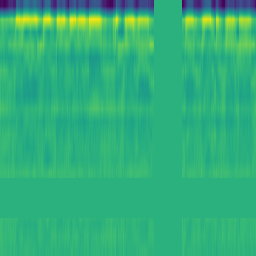

------------------------------------------------------------
File: /root/.fastai/cache/s_5000/0.wav-c8b30aab5ff2e9dfc498d29a5807945d/2.wav
Total Length: 5.0 seconds
Number of Channels: 1
Label: 21.0


Channel 0.0 (256x256):


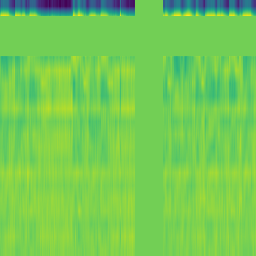

------------------------------------------------------------
File: /root/.fastai/cache/s_5000/0.wav-c8b30aab5ff2e9dfc498d29a5807945d/3.wav
Total Length: 5.0 seconds
Number of Channels: 1
Label: 21.0


Channel 0.0 (256x256):


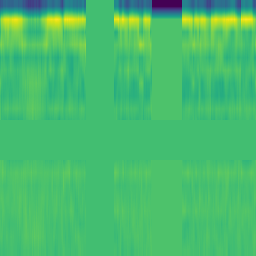

In [16]:
db_sg.show_batch()

In [17]:
from fastai.vision.learner import num_features_model,create_body
base_model = models.resnet34
concat_pool = True

body = create_body(base_model)
nf = num_features_model(nn.Sequential(*body.children())) * (2 if concat_pool else 1)
nc = 1 #num output 
custom_head = create_head(nf,nc,lin_ftrs=[256])
print(custom_head)

Sequential(
  (0): AdaptiveConcatPool2d(
    (ap): AdaptiveAvgPool2d(output_size=1)
    (mp): AdaptiveMaxPool2d(output_size=1)
  )
  (1): Flatten()
  (2): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): Dropout(p=0.25, inplace=False)
  (4): Linear(in_features=1024, out_features=256, bias=True)
  (5): ReLU(inplace=True)
  (6): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): Dropout(p=0.5, inplace=False)
  (8): Linear(in_features=256, out_features=1, bias=True)
)


In [18]:
from fastai.callbacks import *
learn = audio_learner(db_sg, models.resnet34,
                      callback_fns=[ShowGraph],
                      pretrained=False,custom_head=custom_head).mixup()
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


In [0]:
learn.callbacks= learn.callbacks+[SaveModelCallback(learn, every='epoch', monitor='accuracy')]
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,1204.529541,932.608276,0.002392,00:33
1,670.449707,236.673370,0.002392,00:32
2,418.203308,233.422623,0.002392,00:32
3,305.901947,482.976074,0.002392,00:32
4,255.854263,228.038956,0.002392,00:32
5,232.628769,221.047028,0.002392,00:31
6,222.252686,251.208328,0.002392,00:32
7,215.582657,235.054977,0.002392,00:32
8,212.626495,209.041260,0.002392,00:32
9,212.798279,198.067825,0.002392,00:32


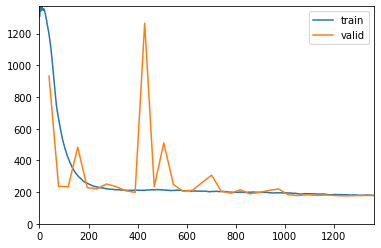

In [20]:
learn.fit_one_cycle(35, slice(1e-2,1e-1),wd=1e-3)

In [0]:
val_preds,val_targets = learn.get_preds()

In [0]:
val_preds,val_targets,loss=learn.get_preds(with_loss=True)

In [0]:
df.index=np.arange(len(df))

In [168]:
df

,age,age_onset,birthplace,filename,native_language,sex,speakerid,country,file_missing?,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,27.0,9.0,"virginia, south africa",afrikaans1.mp3,afrikaans,female,1,south africa,False,NaN,NaN,NaN
1,40.0,5.0,"pretoria, south africa",afrikaans2.mp3,afrikaans,male,2,south africa,False,NaN,NaN,NaN
2,43.0,4.0,"pretoria, transvaal, south africa",afrikaans3.mp3,afrikaans,male,418,south africa,False,NaN,NaN,NaN
3,26.0,8.0,"pretoria, south africa",afrikaans4.mp3,afrikaans,male,1159,south africa,False,NaN,NaN,NaN
4,19.0,6.0,"cape town, south africa",afrikaans5.mp3,afrikaans,male,1432,south africa,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2135,46.0,5.0,"lagos, nigeria",yoruba3.mp3,yoruba,female,766,nigeria,False,NaN,NaN,NaN
2136,46.0,12.0,"lagos, nigeria",yoruba4.mp3,yoruba,male,851,nigeria,False,NaN,NaN,NaN
2137,47.0,2.0,"ibadan, nigeria",yoruba5.mp3,yoruba,female,2023,nigeria,False,NaN,NaN,NaN
2138,31.0,1.0,"bethel, alaska, usa",yupik1.mp3,yupik,female,571,usa,False,NaN,NaN,NaN


In [169]:
df=df[:2138]
a=df.country.value_counts()
a=list(a[a.values<=5].index)
l=[]
for i in range(len(a)):
  l.append(df[df['country']==a[i]].index.values[0])
print(len(l),len(df))

89 2138


In [0]:
from fastai.callbacks import *
from sklearn.model_selection import StratifiedKFold
def answer(path):
  return df[df['filename']==str(path)[22:]].country.values
skf=StratifiedKFold(n_splits=5, shuffle=True)
k=[]
for train_index, test_index in skf.split(df.filename.values[:2138], df.native_language.values[:2138]):
  train_index=list(set(train_index)|set(l))
  test_index = list(set(test_index)-set(l))
  db_sg = (AudioList.from_folder("recordings/recordings", config=config_segment).
         split_by_idxs(train_index,test_index).
         label_from_func(answer).
         transform(tfms=tfms).
         databunch(bs=256))
  learn = audio_learner(db_sg, models.resnet34,callback_fns=[ShowGraph],pretrained=False).mixup()
  learn.callbacks= learn.callbacks+[SaveModelCallback(learn, every='epoch', monitor='accuracy')]
  learn.fit_one_cycle(35, slice(1e-4,1e-2),wd=1e-3)